# Ch `03`: Concept `03`

## Regularization

Import the relevant libraries and initialize the hyper-parameters

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.

create a helper method to split the dataset

In [2]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    y_train = y_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

Create a fake dataset. y = x^2

In [3]:
x_dataset = np.linspace(-1, 1, 100)

num_coeffs = 9
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

Split the dataset into 70% training and testing 30%

In [4]:
(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)


Set up the input/output placeholders

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

Define our model

In [6]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

Define the regularized cost function

In [7]:
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)),
                     tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),
              2*x_train.size)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Set up the session

In [8]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Try out various regularization parameters 

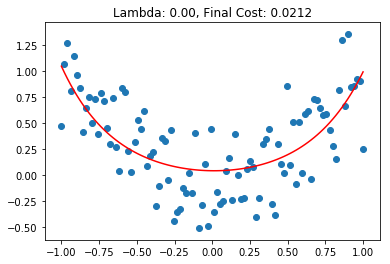

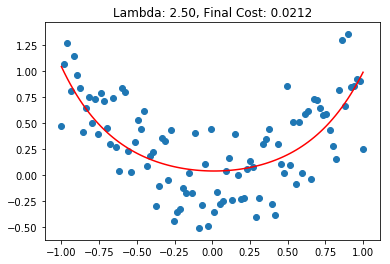

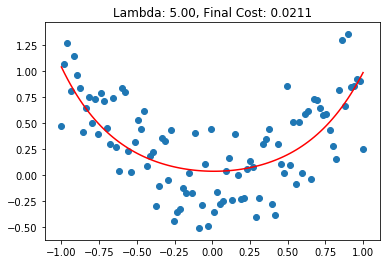

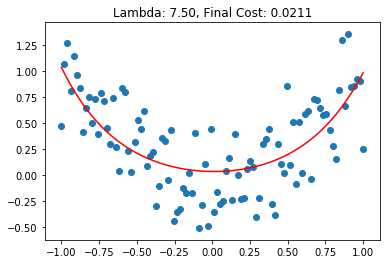

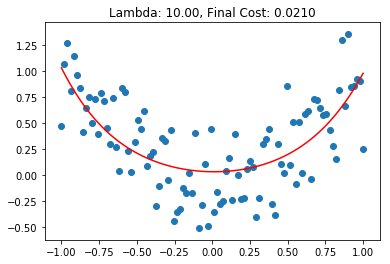

In [10]:
for reg_lambda in np.linspace(0,10,5):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: x_train, Y: y_train})
    final_cost = sess.run(cost, feed_dict={X: x_test, Y:y_test})
  
    plt.figure()
    plt.scatter(x_dataset, y_dataset)
    w_val = sess.run(w)
    trY2 = 0
    for i in range(num_coeffs):
        trY2 += w_val[i] * np.power(x_dataset, i)
    plt.plot(x_dataset, trY2, 'r')
    plt.title('Lambda: {0:.2f}, Final Cost: {1:.4f}'.format(reg_lambda,final_cost))
    plt.show()

Close the session

In [11]:
sess.close()